# A basic MPL example using Sequential layers

In this Notebook, I'll provide a basic example of how to use the MPL network with Sequential layers. Specifically, I utilized the cifar10 dataset, which consists of 50,000 32x32 color training images and 10,000 test images, categorized into 10 classes. For additional information on the dataset, please visit the CIFAR homepage.

Although it's a small dataset, it provides ample opportunities to experiment with various models, techniques, and approaches.

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K


# Load Dataset 

In [54]:
'''
Here we will load the cifar10 dataset and then normalize the train  and test datasets. 
'''

cifar10_data = tf.keras.datasets.cifar10
(train_images , train_labels),(test_images, test_labels) = cifar10_data.load_data()
train_images = train_images/255.
test_images = test_images / 255.


Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the
[CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(50000, 32, 32, 3)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(50000, 1)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  `(10000, 32, 32, 3)`, containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(10000, 1)` for the test data.

Example:

```python
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)

assert x_test.shape == (10000, 32, 32, 3)

assert y_train.shape == (50000, 1)

assert y_test.shape == (10000, 1)

# Building mlp model

In [55]:
# In this stepwe use the sequential layers and build an mlp model. 

# Note that, this is an example of mine and you can edit, add or remove your layers and items. 

model = tf.keras.models.Sequential(name = 'my_model')
model.add(tf.keras.layers.Flatten(input_shape = (32,32,3) , name = 'Input_layer'))
model.add(tf.keras.layers.Dense(units = 64 , name = 'Hidden_layer_1' , activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64 , name = 'Hidden_layer_2' , activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 10 , name = 'Hidden_layer_3' , activation = 'linear')) 
model.add(tf.keras.layers.Softmax(name = 'SoftMax_layer')) 

In [56]:
#Here we use summary method to see the parameters details in this model
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 3072)              0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 64)                196672    
                                                                 
 Hidden_layer_2 (Dense)      (None, 64)                4160      
                                                                 
 Hidden_layer_3 (Dense)      (None, 10)                650       
                                                                 
 SoftMax_layer (Softmax)     (None, 10)                0         
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


In [57]:
#Here use one-hot methd and classify  the train_labels and the test_labels as one-hot codes

train_labels_one_hot = K.one_hot(train_labels , 10) # take a tensor as input and gives its classes 
test_labels_one_hot = K.one_hot(test_labels , 10) #we set 10, cause or label set has 10 classes

In [58]:
# we check the shape of the train_labels after one-hot coding

train_labels_one_hot.shape

TensorShape([50000, 1, 10])

In [59]:
# here we should change the shape of the one_hot label set to (50000 , 10)

train_labels_one_hot = train_labels_one_hot[ : , 0 , :] #this means we dont need the second element '1' and make it 0
test_labels_one_hot = test_labels_one_hot[ : , 0 , :]
test_labels_one_hot.shape

TensorShape([10000, 10])

In [60]:
train_labels_one_hot[:5] # see the labels to gain better intuition of the one-hot labels

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [61]:
train_labels[:5] # here we check the place of the label in the train_labelsand check them with on-hot version of the train_labels

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# Setting Loss, Optimizer,Accuracy anf then compile the model 

In [62]:
#Since we are working with one-hot train_labels and test_labels, we need to use tf.keras.losses.CategoricalCrossentropy() to obtain the loss value


loss = tf.keras.losses.CategoricalCrossentropy()

optimizer =  tf.keras.optimizers.SGD(learning_rate=0.005 , nesterov= True , momentum = 0.1 )
acc = tf.keras.metrics.CategoricalAccuracy()

#Remaek:
#if we use Sparss... in loss here we use Sparss...
#if we use CategoricalCro... , here we need to use Categor... as well. 


model.compile(optimizer = optimizer,
              loss=loss,
              metrics= [acc, ])

# Fitting the model

In [63]:

# Here we fit model on the whole training set 

history = model.fit(train_images , train_labels_one_hot,
                   batch_size= 64, epochs=50 , verbose=1)


Epoch 1/50
782/782 [==============================] - 11s 7ms/step - loss: 2.0520 - categorical_accuracy: 0.2579
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.8631 - categorical_accuracy: 0.3426
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7902 - categorical_accuracy: 0.3697
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.7415 - categorical_accuracy: 0.3855
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7044 - categorical_accuracy: 0.4013
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6737 - categorical_accuracy: 0.4099
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 1.6468 - categorical_accuracy: 0.4200
Epoch 8/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6239 - categorical_accuracy: 0.4277
Epoch 9/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6014 - categorical_accuracy

In [65]:
# Create a pandas DataFrame to see the reults of the train for each epoch

df = pd.DataFrame(history.history)
df

,loss,categorical_accuracy
0,2.051991,0.25788
1,1.863062,0.34256
2,1.790218,0.36970
3,1.741540,0.38552
4,1.704432,0.40132
5,1.673677,0.40986
6,1.646760,0.42000
7,1.623940,0.42774
8,1.601433,0.43518
9,1.583697,0.44172


### Ploting the results 

[Text(0.5, 0, '#epoch'), Text(0, 0.5, 'loss')]

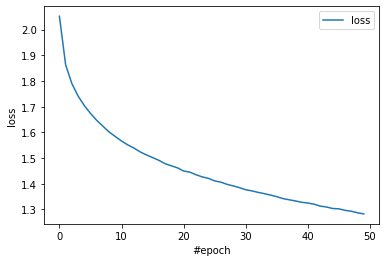

In [66]:
#Plot of  the loss values 

what_to_see = 'loss'

my_plot = df.plot(y=what_to_see)
my_plot.set(xlabel = '#epoch' , ylabel = what_to_see)

[Text(0.5, 0, '#epoch'), Text(0, 0.5, 'categorical_accuracy')]

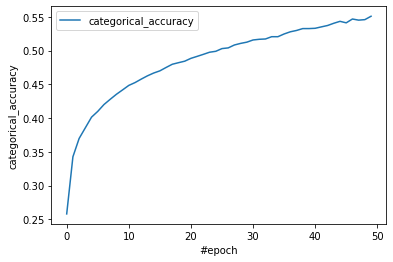

In [67]:
#plot of the categorical_accuracy

what_to_see1 = 'categorical_accuracy'

my_plot = df.plot(y=what_to_see1)
my_plot.set(xlabel = '#epoch' , ylabel = what_to_see1)

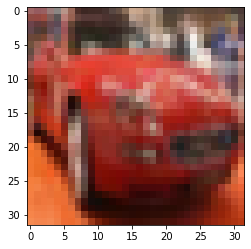

digit label: 1, one_hot label:[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [69]:
# Following example helps us to see how we can set a label and its corresponding image

# let we want to see the image the fifth image in the training set

idx = 5

tmp_image , tmp_label , tmp_one_hot = train_images[idx] , train_labels[idx,0] , train_labels_one_hot[idx]
plt.imshow(tmp_image)
plt.show()

print(f'digit label: {tmp_label}, one_hot label:{tmp_one_hot}')



In [70]:
model.predict(tmp_image[tf.newaxis , ...]) # using [tf.newaxis wecan add a dimension as batch size to our tmp_image


array([[0.10721423, 0.404457  , 0.00141529, 0.02864186, 0.03122306,
        0.02486805, 0.03090061, 0.27995878, 0.00337229, 0.08794881]],
      dtype=float32)

In [71]:
# Now we should find the biggest number and take its class as our class
# We use K.argmax. this code returns the number of place for the maximum
result = model.predict(tmp_image[tf.newaxis , ...])
index_result = K.argmax(result)
index_result, result
#print(f'index result: {index_result}, and the result {result}')

(<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1], dtype=int64)>,
 array([[0.10721423, 0.404457  , 0.00141529, 0.02864186, 0.03122306,
         0.02486805, 0.03090061, 0.27995878, 0.00337229, 0.08794881]],
       dtype=float32))